# Opening CZI files
When working with microscopy image data, many file formats are circulating such as the Carl Zeiss Image (CZI) format. In this notebook, we will open a `.czi` file using the [`czifile` library](https://pypi.org/project/czifile/).

Note: It is recommended to use [AICSImageIO](https://github.com/AllenCellModeling/aicsimageio) for reading CZI files as shown in this [notebook](image_file_formats:aicsimagio).

See also
* [Reading CZI file in Python (image.sc thread)](https://forum.image.sc/t/reading-czi-file-in-python/39768/11))

In [1]:
import czifile

from pathlib import Path
from skimage.io import imshow
import numpy as np

We can open an image usually by providing a path to it to an `imread` function. In the following we are using an image showing a Drosophila wing during pupal stage kindly provided by Romina Piscitello-Gómez (MPI CBG).

In [2]:
image = czifile.imread(Path("../../data/PupalWing.czi"))

A first good step is to inspect the dimensionality of the image.

In [3]:
image.shape

(1, 1, 1, 80, 520, 692, 1)

These formats usually have extra dimensions to accomodate many different data shapes. This is their common order when working with CZI files:
- 'X': 'Width'
- 'Y': 'Height'
- 'C': 'Channel'
- 'Z': 'Slice' (depth)
- 'T': 'Time'
- 'R': 'Rotation'
- 'S': 'Scene' / contiguous regions of interest in a mosaic image

We know that our image had three dimensions when we acquired it. One trick to get rid of the unecessary extra dimensions is the [np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html) function.

In [4]:
image_squeezed = np.squeeze(image)
image_squeezed.shape

(80, 520, 692)

The image is a numpy array and thus, we can work with it normally.

In [5]:
type(image_squeezed)

numpy.ndarray

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


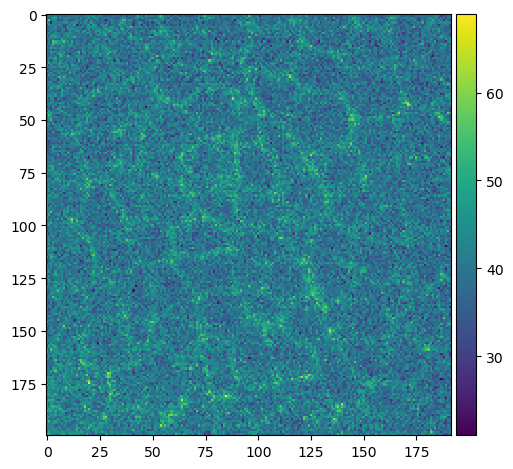

In [6]:
cropped_slice_image = image_squeezed[40, 200:400, 500:700]

imshow(cropped_slice_image)